<a href="https://colab.research.google.com/github/Subhajit-Dey45/EDA-on-Netflix/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project name : Comprehensive EDA on Netflix Movies & TV Shows (2023)
## Project type - EDA

## Contribution - Subhajit Dey


##Project Overview
This project conducts an in-depth Exploratory Data Analysis (EDA) on Netflix's extensive catalog of movies and TV shows as of 2023. The analysis aims to uncover patterns, trends, and insights about the content available on Netflix, including distribution by type, country of origin, genres, and more. By leveraging Python's powerful data analysis and visualization libraries, we transform raw data into actionable insights.

##Introduction
Netflix has become a dominant force in the entertainment industry, offering a vast library of movies and TV shows. This project explores the Netflix dataset to understand the composition of its content, identify popular genres, and analyze trends across different regions. The insights derived can help content creators, marketers, and subscribers understand Netflix's offerings better.

In [43]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [44]:
# Load Netflix data directly from Kaggle
import kagglehub
path = kagglehub.dataset_download("shivamb/netflix-shows")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/netflix-shows


##Data Loading
The dataset is sourced directly from Kaggle and loaded into a Pandas DataFrame for analysis. The dataset includes details such as show type, title, director, cast, country of production, release year, rating, duration, genres, and descriptions.

In [45]:
import os
os.listdir(path)
file_path = os.path.join(path, 'netflix_titles.csv')
netflix_data = pd.read_csv(file_path)
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##Initial Data Inspection
The dataset contains 8,807 entries with 12 columns. Key observations:

Missing Values: Significant missing data in columns like director, country, and cast.

Data Types: Most columns are of object type, except release_year, which is numeric.

In [46]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [47]:
# Check missing values
missing = netflix_data.isnull().sum().sort_values(ascending=False)
print(missing)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64


##Checking for missing data
This shows that director,country,cast have a number of missing values and columns like date_added,rating,duration have a very few number of missing values

In [48]:
# Handle missing data
netflix_data['country'].fillna('Unknown')
netflix_data['cast'].fillna('No Cast')
netflix_data['director'].fillna('No Director')

,director
0,Kirsten Johnson
1,No Director
2,Julien Leclercq
3,No Director
4,No Director
...,...
8802,David Fincher
8803,No Director
8804,Ruben Fleischer
8805,Peter Hewitt


##Handling Missing Data
To ensure data integrity, missing values in critical columns like country, cast, and director are filled with placeholders like "Unknown" or "No Cast."

In [49]:
# Convert date_added to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

# Extract year/month
netflix_data['year_added'] = netflix_data['date_added'].dt.year
netflix_data['month_added'] = netflix_data['date_added'].dt.month_name()

##Feature Engineering
The date_added column is converted to datetime format, and new columns (year_added, month_added) are extracted for temporal analysis.

##Key Insights and Visualizations

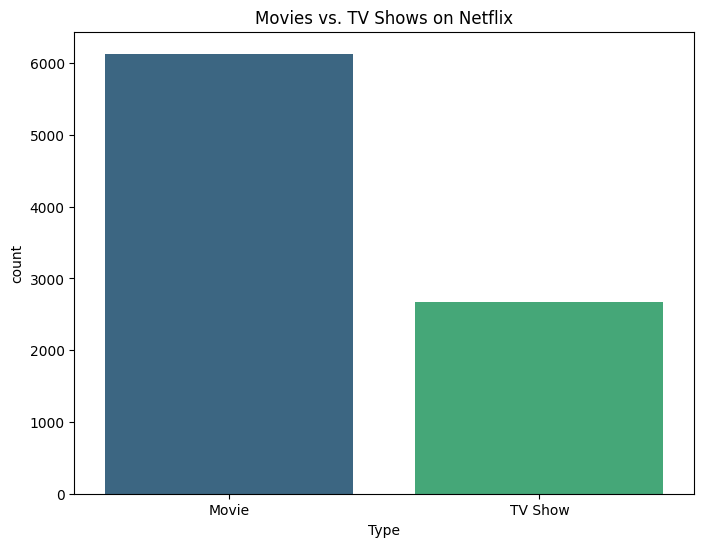

In [50]:
#Movies vs TV Shows
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=netflix_data, palette='viridis',hue='type')
plt.xlabel('Type')
plt.title('Movies vs. TV Shows on Netflix')
plt.show()

##Movies vs. TV Shows
Netflix's catalog is dominated by movies, which make up approximately 70% of the content, while TV shows account for the remaining 30%. This highlights Netflix's focus on movies as its primary content type.

Insight: The preference for movies over TV shows could reflect Netflix's strategy to cater to viewers seeking standalone content.

In [51]:
#Content country-wise
country_counts = netflix_data['country'].value_counts().head(10)
fig = px.bar(country_counts, title='Top 10 Countries by Content')
fig.show()

##Content by Country
The United States produces the majority of Netflix's content, followed by India and the United Kingdom. This aligns with Netflix's investment in original content from these regions.

Insight: The dominance of the U.S. and India suggests Netflix's targeted content creation for these large markets. Expanding into other regions could diversify the catalog further.

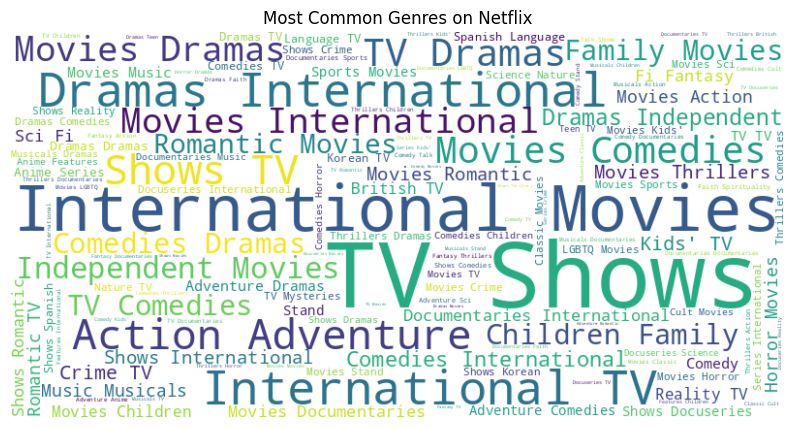

In [52]:
#Most common genres
from wordcloud import WordCloud

text = ' '.join(netflix_data['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Genres on Netflix')
plt.show()

##Popular Genres
A word cloud of the listed_in column reveals that "International TV Shows," "Comedies," and "Dramas" are the most common genres on Netflix. This indicates a strong global appeal and a focus on entertainment that transcends cultural boundaries.


Insight: The prominence of international content underscores Netflix's strategy to cater to a global audience. Diversifying genres could attract niche audiences.

In [53]:
#Content Growth
trend = netflix_data['year_added'].value_counts().sort_index()
fig = px.line(trend, title='Netflix Content Growth (2010-2023)')
fig.show()

##Release Trends Over Time
The number of titles added to Netflix has grown significantly over the years, peaking in recent years. This reflects Netflix's aggressive expansion and content acquisition strategy.

Insight: The upward trend in content additions suggests Netflix's commitment to maintaining a fresh and engaging library for subscribers.

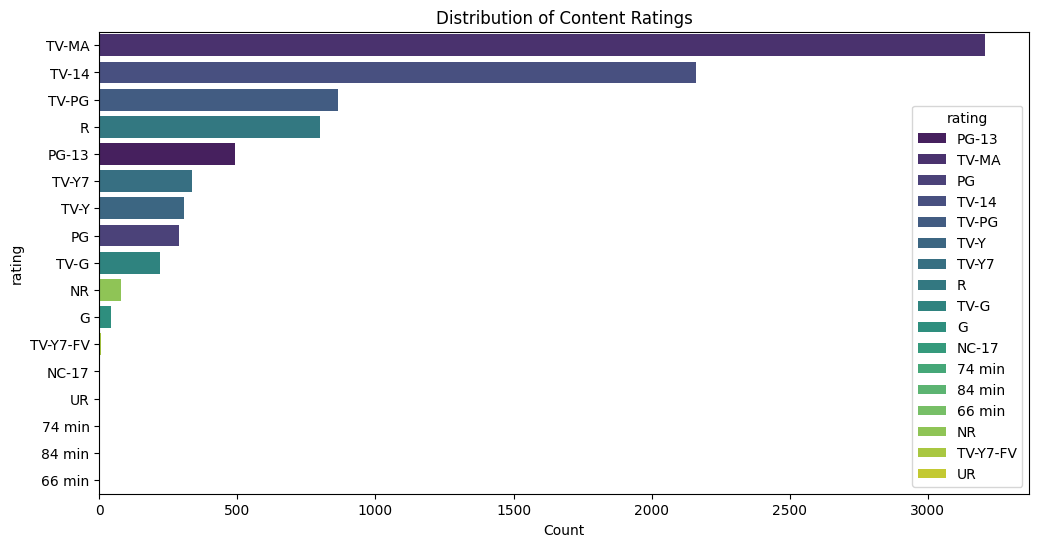

In [54]:
#Content Ratings
plt.figure(figsize=(12, 6))
sns.countplot(y='rating', data=netflix_data, order=netflix_data['rating'].value_counts().index, palette='viridis',hue='rating')
plt.xlabel('Count')
plt.title('Distribution of Content Ratings')
plt.show()

##Ratings Analysis
Netflix content is primarily rated for mature audiences, with TV-MA (Mature Audiences) being the most common rating, followed by TV-14 and R. This suggests that Netflix caters heavily to adult viewers.

Insight:
Netflix's content strategy leans toward mature and teen audiences, with fewer offerings for younger children. Expanding kids' content could attract more family subscribers.

In [55]:
#Installing pycountry-convert
%pip install pycountry-convert

In [56]:
#Content by Continent
import pycountry_convert as pc
def get_continent(country):
    if country == 'Unknown':
        return 'Unknown'
    try:
        # Handle cases where country names might be problematic
        country = country.split(',')[0].strip()
        # Special cases that pycountry_convert might not handle
        if country == 'United States':
            country = 'United States of America'
        elif country == 'United Kingdom':
            country = 'United Kingdom of Great Britain and Northern Ireland'
        elif country == 'South Korea':
            country = 'Korea, Republic of'

        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return 'Unknown'

netflix_data['country'] = netflix_data['country'].fillna('Unknown')
netflix_data['continent'] = netflix_data['country'].apply(get_continent)

# Plot
continent_counts = netflix_data['continent'].value_counts()
fig = px.pie(continent_counts, values=continent_counts.values, names=continent_counts.index, title='Content by Continent')
fig.show()

##Content by Continent analysis
The United States produces the majority of Netflix's content, followed by India and the United Kingdom. This aligns with Netflix's investment in original content from these regions.

Insight: The dominance of the U.S. and India suggests Netflix's targeted content creation for these large markets. Expanding into other regions could diversify the catalog further.

In [57]:
# Get top 10 directors (excluding 'No Director')
top_directors = netflix_data[netflix_data['director'] != 'No Director']['director'].value_counts().head(10)
fig = px.bar(top_directors, title='Top 10 Directors with Most Content on Netflix',labels={'value': 'Number of Titles', 'index': 'Director'})
fig.show()

##Directors & Cast Analysis
Rajiv Chilaka (children’s content) and Raúl Campos, Jan Suter (collaborators on multiple projects) are among the most frequent directors.

Many entries have missing director data, suggesting incomplete metadata.

Insight:Netflix invests in regional content, particularly from India and Japan.
Incomplete metadata (missing directors/cast) suggests room for data quality improvements.

In [58]:
# Extract duration for movies
movies = netflix_data[netflix_data['type'] == 'Movie'].copy()
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)
fig = px.box(movies, y='duration_min',title='Duration Distribution for Movies (in minutes)',labels={'duration_min': 'Duration (minutes)'})
fig.show()

## Duration Trends
Movies: Most films are between 90–120 minutes, aligning with standard theatrical runtimes.

Insight:Movies follow conventional runtime trends, ensuring viewer engagement without excessive length.

In [59]:
# Extract seasons for TV shows
tv_shows = netflix_data[netflix_data['type'] == 'TV Show'].copy()
tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)
fig = px.histogram(tv_shows, x='num_seasons',nbins=20,title='Number of Seasons for TV Shows',
labels={'num_seasons': 'Number of Seasons', 'count': 'Number of Shows'},color_discrete_sequence=['#E50914'])  # Netflix red color
fig.show()

##TV Shows: Seasons
The majority have 1–3 seasons, with very few exceeding 5 seasons.

Insight:TV Shows mostly have 1–3 seasons, indicating Netflix’s preference for limited series or cancellations after a few seasons.

#Key Conclusions & Strategic Recommendations
##Content Strategy Insights
***Movies Dominate, But TV Shows Are Growing***

70% of Netflix’s catalog consists of movies, but TV shows are gaining traction.

Recommendation: Invest in high-quality limited series to attract binge-watchers.

***Mature Audiences Are the Primary Target***

TV-MA and R-rated content dominate, aligning with adult preferences.

Recommendation: Expand family-friendly content to capture younger demographics.

***U.S. & India Lead in Content Production***

The U.S. produces the most content, followed by India.

Recommendation: Increase localization efforts in emerging markets (e.g., Africa, Southeast Asia).

***Limited TV Show Seasons Suggest High Churn***

Most TV shows have 1–3 seasons, indicating cancellations or short-term strategies.

Recommendation: Extend successful series to improve subscriber retention.

***Inconsistent Metadata Affects Analysis***

Missing director, cast, and country data limit deeper insights.

Recommendation: Improve data collection processes for better analytics.

#Business Recommendations
##Expand Kids & Family Content:

Introduce more TV-Y, G, and PG-rated shows to attract family subscriptions.

##Increase Non-English & Regional Content:

Invest in Korean dramas, Spanish telenovelas, and African cinema to diversify the catalog.

##Improve Metadata Completeness:

Partner with studios to ensure director, cast, and country data is consistently recorded.

##Focus on Limited Series & Anthologies:

Since most TV shows are short-lived, anthology series (e.g., Black Mirror) could be a sustainable model.

##Final Takeaway
Netflix’s content strategy is data-driven yet evolving. While it excels in mature, movie-heavy, and U.S.-centric content, opportunities exist in kids' programming, non-English originals, and extended series. By refining its catalog based on these insights, Netflix can enhance user retention and global reach.

